In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded=files.upload()

Saving Cardiotocographic.csv to Cardiotocographic.csv


In [7]:
data=pd.read_csv("Cardiotocographic.csv")
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [9]:
print(data.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [8]:
print(data.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [16]:
for column in data.select_dtypes(include=np.number):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [12]:
print(data)

         LB        AC   FM        UC        DL   DS   DP  ASTV      MSTV  \
1     132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0  2.100000   
2     133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0  2.100000   
59    144.0  0.008143  0.0  0.006595  0.000000  0.0  0.0  33.0  1.100000   
62    142.0  0.000000  0.0  0.003311  0.000000  0.0  0.0  25.0  1.300000   
63    136.0  0.002513  0.0  0.005025  0.000000  0.0  0.0  24.0  1.500000   
...     ...       ...  ...       ...       ...  ...  ...   ...       ...   
2067  130.0  0.009401  0.0  0.003535  0.000000  0.0  0.0  67.0  1.048883   
2078  130.0  0.004789  0.0  0.000958  0.000000  0.0  0.0  73.0  0.600000   
2079  130.0  0.003525  0.0  0.001175  0.000026  0.0  0.0  75.0  0.600000   
2095  133.0  0.000000  0.0  0.004032  0.000000  0.0  0.0  75.0  0.400000   
2096  133.0  0.000000  0.0  0.006711  0.000000  0.0  0.0  75.0  0.400000   

           ALTV  MLTV       Width  Tendency  NSP  
1      0.000000  10.4  130.000000  0

**Statistical Summary:**

In [17]:
print("The mean of given data is : ",data.mean())
print("The median of given data is : ",data.median())
print("The standard dev is : ",data.std(),)
print("The interquartile rangey : ",data.quantile(0.75)-data.quantile(0.25))

The mean of given data is :  LB          131.633486
AC            0.004106
FM            0.000000
UC            0.005178
DL            0.000370
DS            0.000000
DP            0.000000
ASTV         38.589756
MSTV          1.110009
ALTV          1.566540
MLTV          9.600267
Width        53.248794
Tendency      0.216304
NSP           1.000000
dtype: float64
The median of given data is :  LB          132.000000
AC            0.003599
FM            0.000000
UC            0.005369
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         36.000000
MSTV          1.100000
ALTV          0.000000
MLTV          9.750000
Width        49.000000
Tendency      0.000000
NSP           1.000000
dtype: float64
The standard dev is :  LB          10.626001
AC           0.003702
FM           0.000000
UC           0.002612
DL           0.000739
DS           0.000000
DP           0.000000
ASTV        13.918269
MSTV         0.400484
ALTV         2.797303
MLTV         3.989260
W

**Data Visualization**

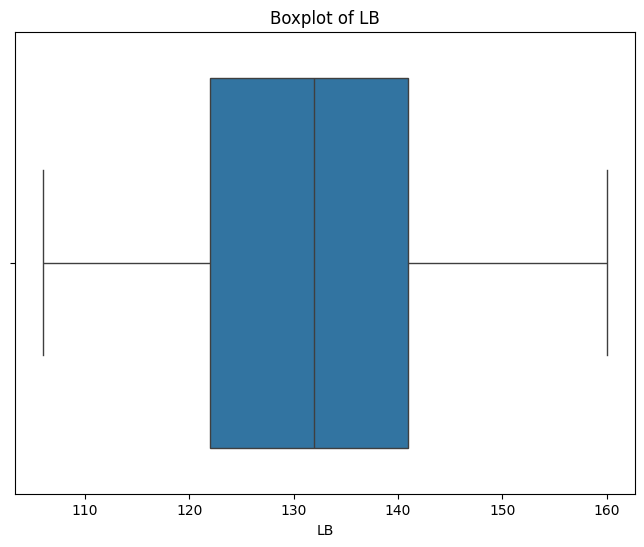

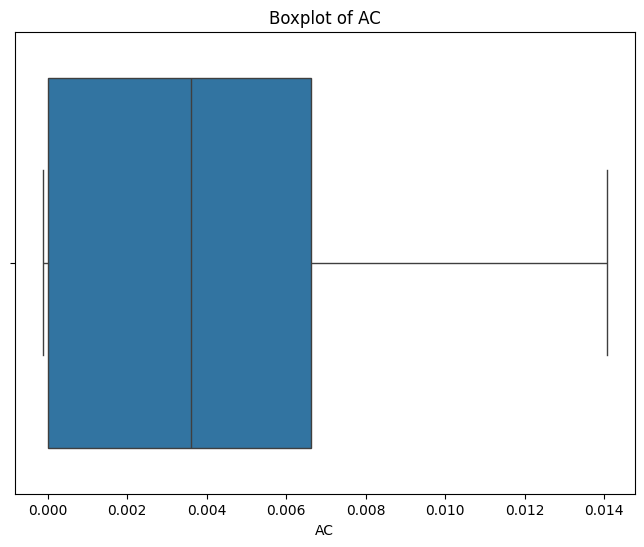

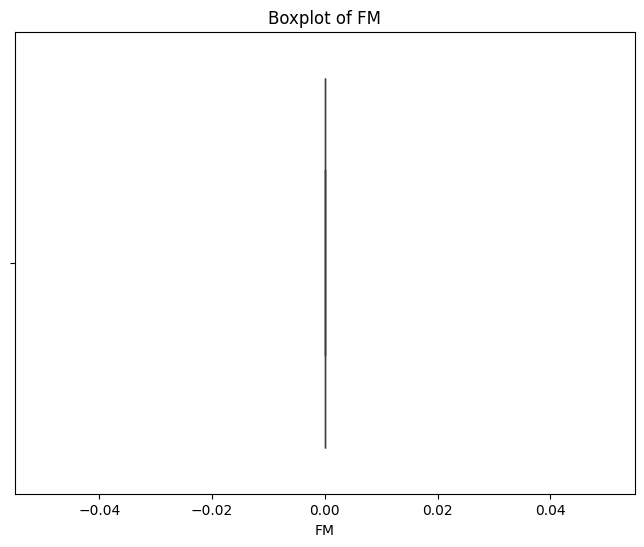

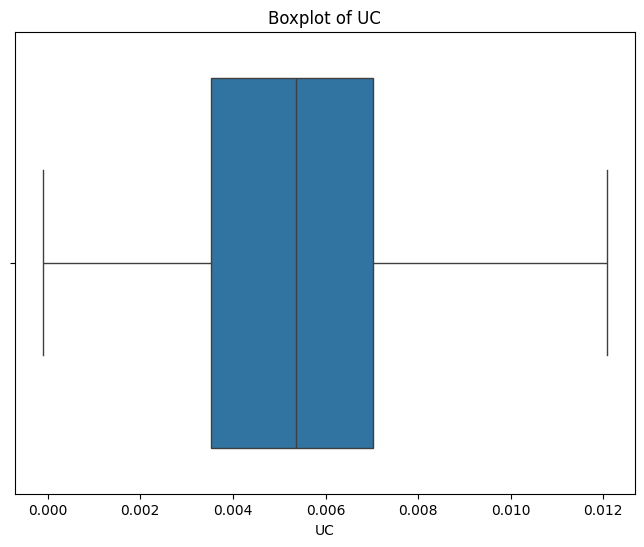

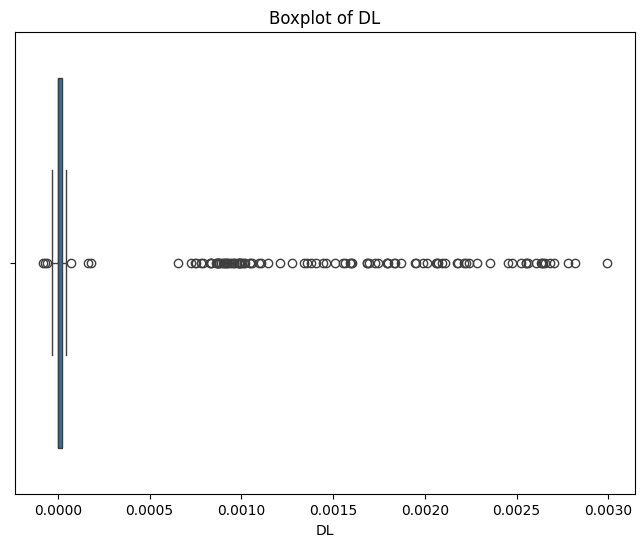

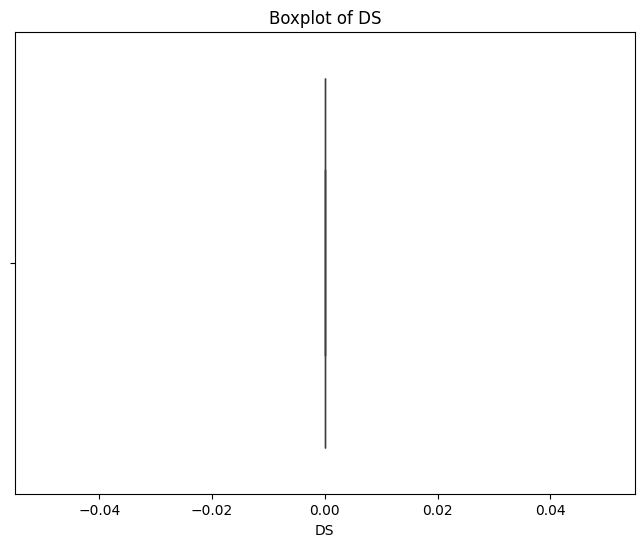

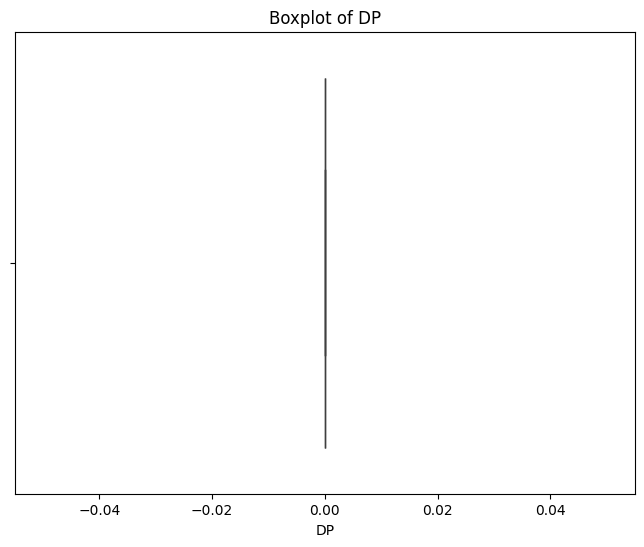

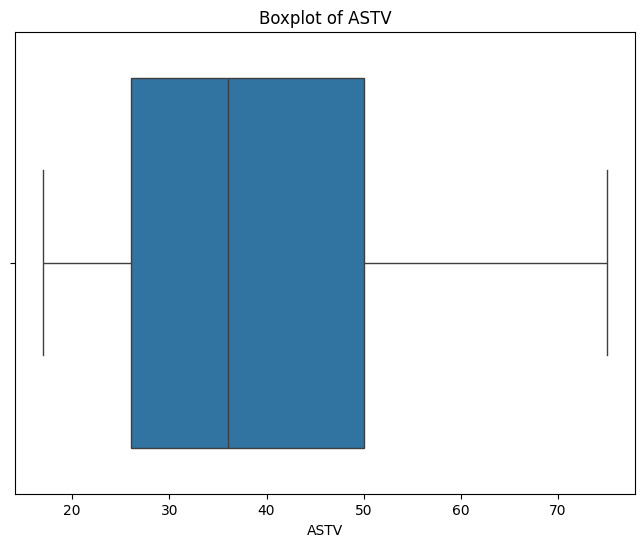

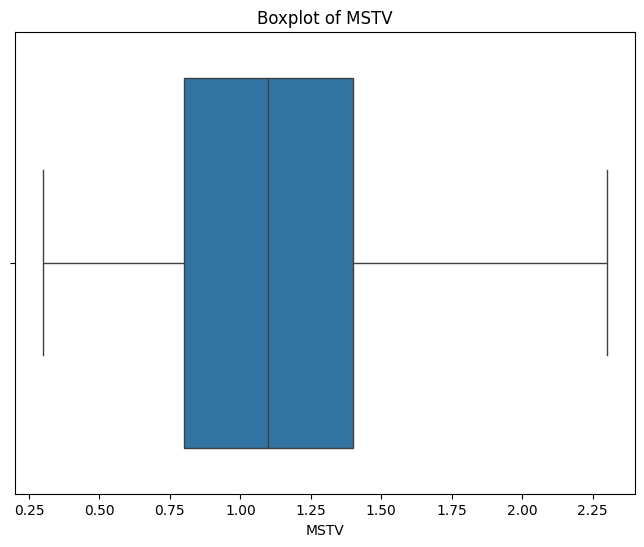

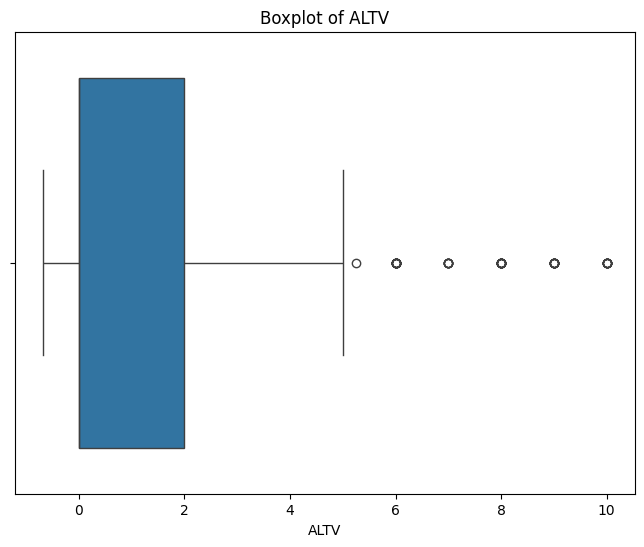

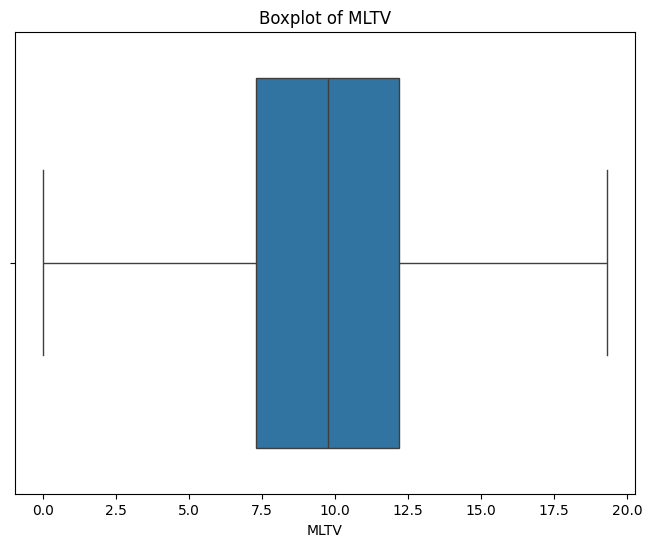

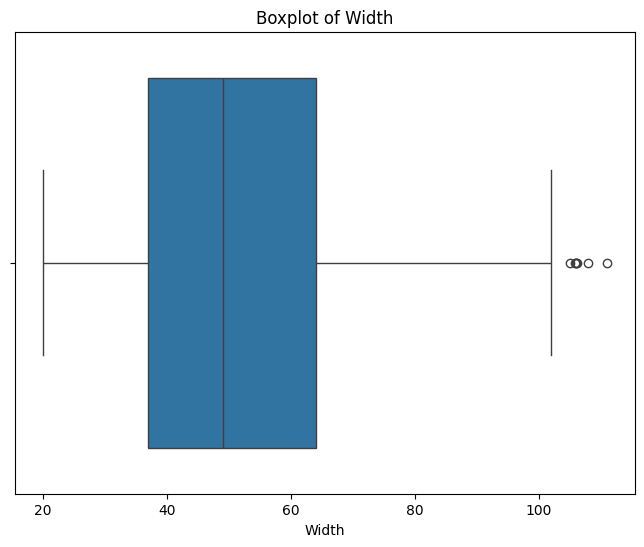

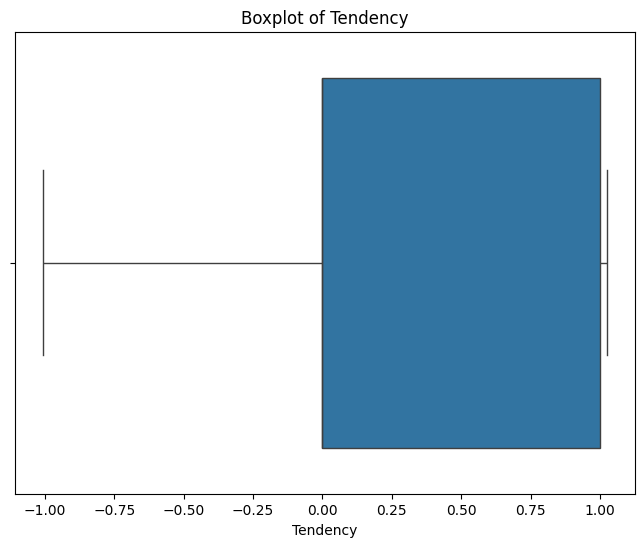

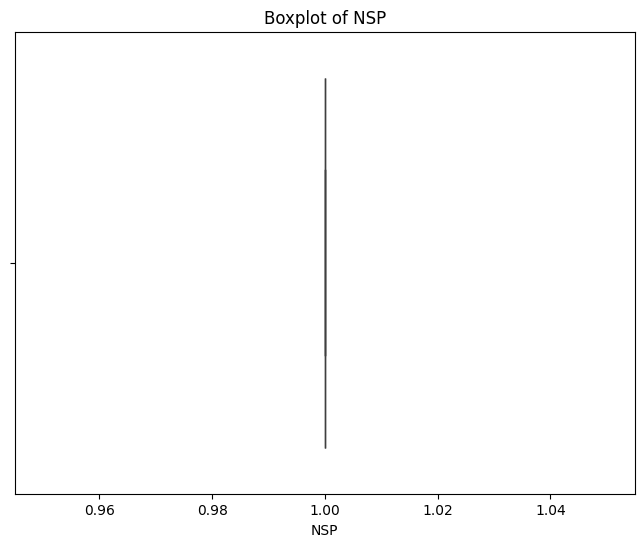

In [19]:
# Boxplot visualize the distributions of various numerical variables.

for column in data.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[column])
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)
  plt.show()

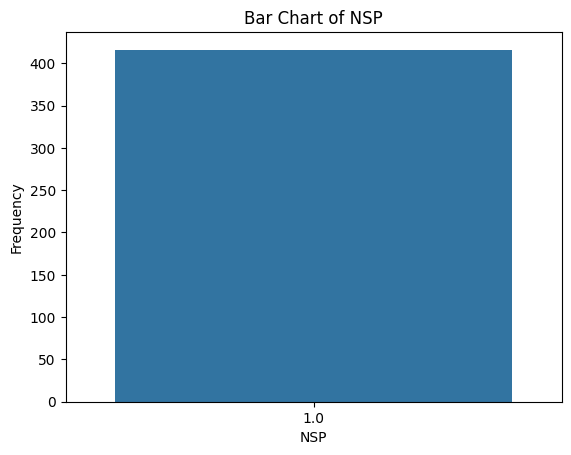

In [54]:
# Bar chart to display the frequency of categories for categorical variables.

sns.countplot(x=column, data=data)
plt.title(f'Bar Chart of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

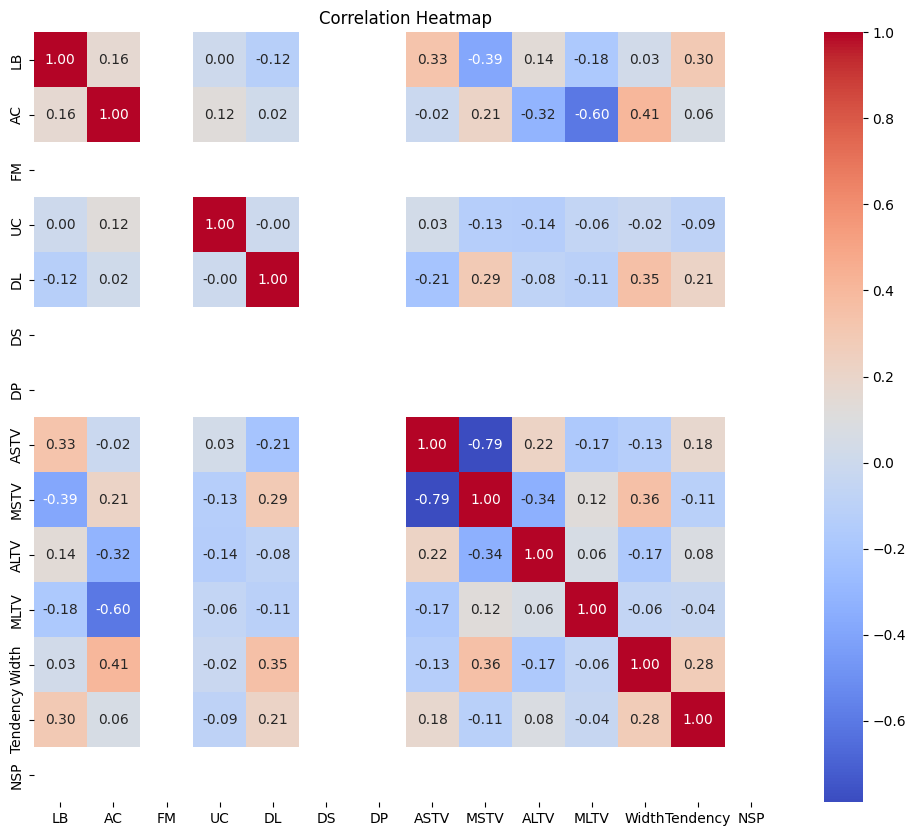

In [57]:
# 	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

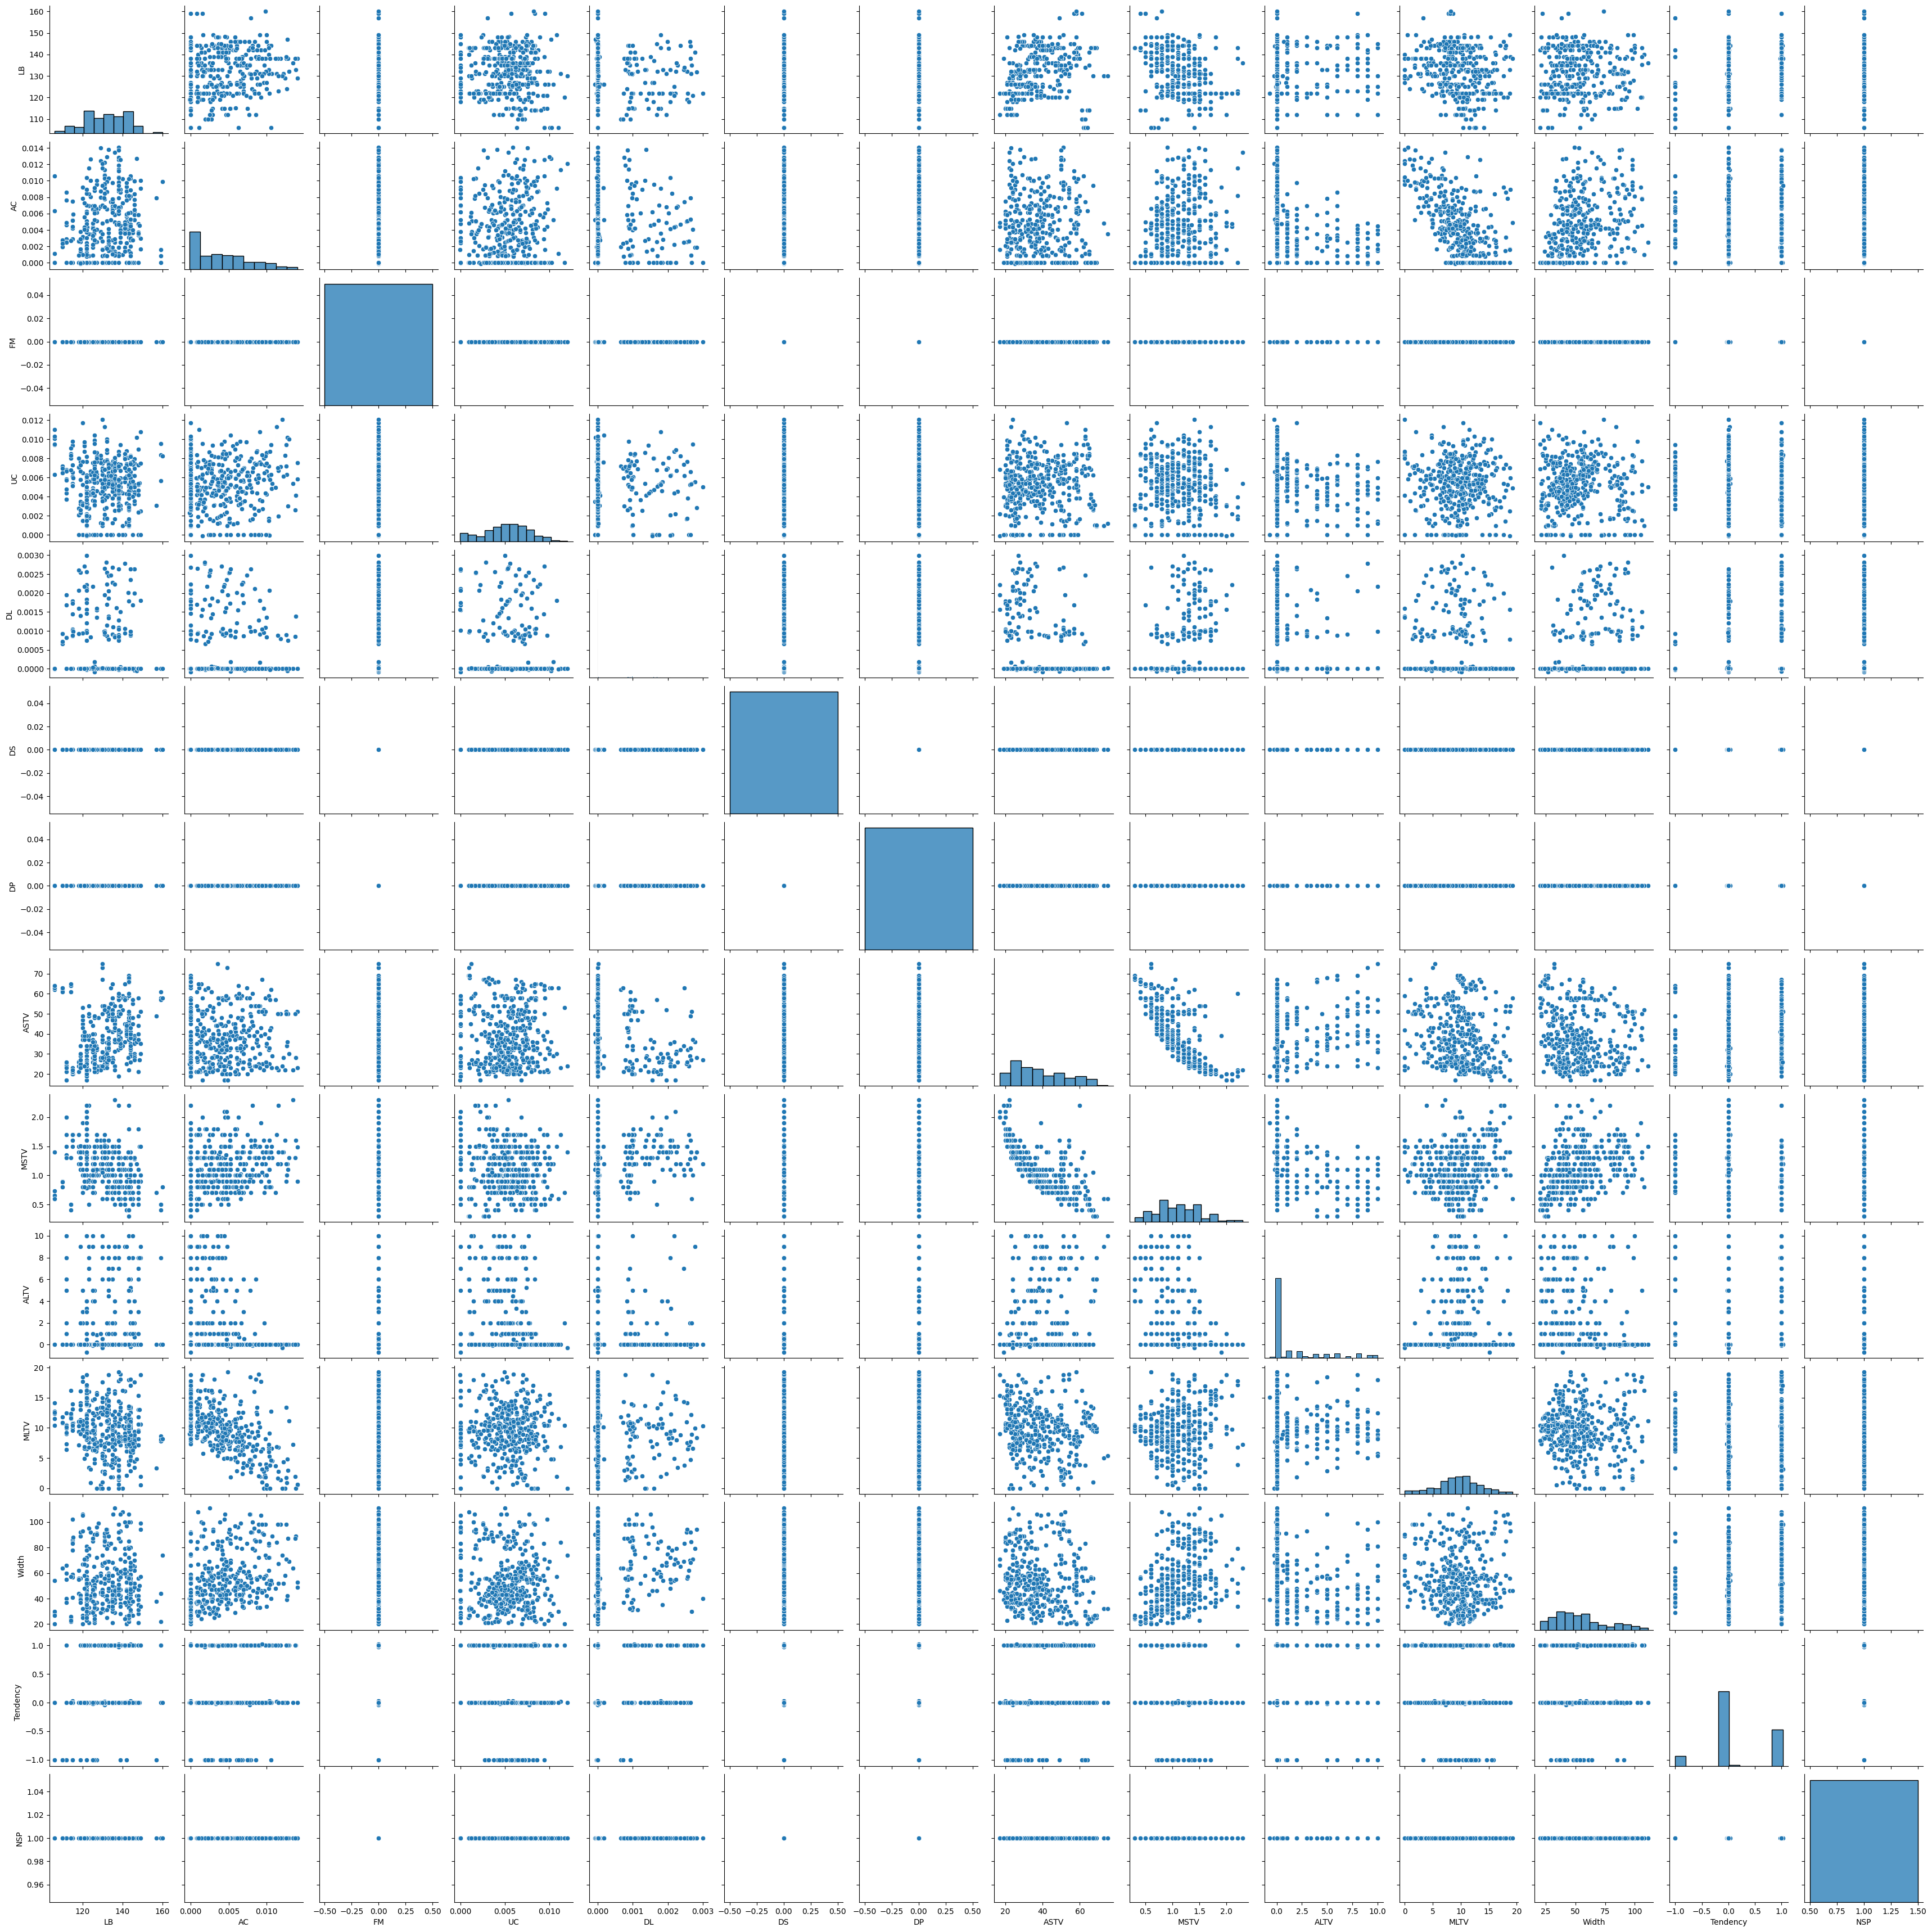

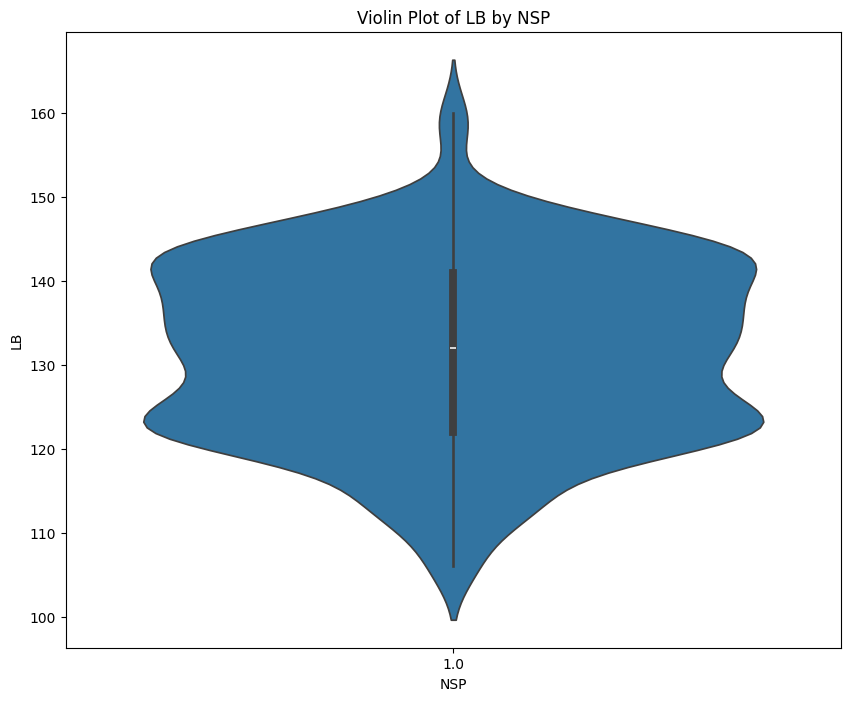

In [59]:
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

if 'NSP' in data.columns:
  plt.figure(figsize=(10, 8))
  sns.violinplot(x='NSP', y='LB', data=data)  # Replace 'LB' with your numerical variable
  plt.title('Violin Plot of LB by NSP')
  plt.xlabel('NSP')
  plt.ylabel('LB')
  plt.show()

**Pattern Recognition and Insights**

 Identify any correlations between variables and discuss their potential implications.

In [61]:
correlation_matrix = data.corr()
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.7]

print("Strong correlations (above 0.7):")
print(strong_correlations)


Strong correlations (above 0.7):
           LB   AC  FM   UC   DL  DS  DP      ASTV      MSTV  ALTV  MLTV  \
LB        1.0  NaN NaN  NaN  NaN NaN NaN       NaN       NaN   NaN   NaN   
AC        NaN  1.0 NaN  NaN  NaN NaN NaN       NaN       NaN   NaN   NaN   
FM        NaN  NaN NaN  NaN  NaN NaN NaN       NaN       NaN   NaN   NaN   
UC        NaN  NaN NaN  1.0  NaN NaN NaN       NaN       NaN   NaN   NaN   
DL        NaN  NaN NaN  NaN  1.0 NaN NaN       NaN       NaN   NaN   NaN   
DS        NaN  NaN NaN  NaN  NaN NaN NaN       NaN       NaN   NaN   NaN   
DP        NaN  NaN NaN  NaN  NaN NaN NaN       NaN       NaN   NaN   NaN   
ASTV      NaN  NaN NaN  NaN  NaN NaN NaN  1.000000 -0.789541   NaN   NaN   
MSTV      NaN  NaN NaN  NaN  NaN NaN NaN -0.789541  1.000000   NaN   NaN   
ALTV      NaN  NaN NaN  NaN  NaN NaN NaN       NaN       NaN   1.0   NaN   
MLTV      NaN  NaN NaN  NaN  NaN NaN NaN       NaN       NaN   NaN   1.0   
Width     NaN  NaN NaN  NaN  NaN NaN NaN       NaN     

Conclusion

Overall, the exploratory data analysis provides a valuable foundation for making informed decisions about fetal health and further research.

By understanding the relationships between variables and identifying key patterns, we can improve our ability to predict potential risks and provide better care for pregnant women and their fetuses.
